### TODO
- trouver le meilleur modele en local
- analyse des features importances / SHAP
- celles qui ont le moins d'interet -> drop : 'Range F 14'
- en choisir qqunes (5) pour faire des sliding windows

- **Faire du feature engineering comme sur les predictions de feu**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_train = pd.read_csv("data_final/data_train.csv", index_col = 0)
data_test = pd.read_csv("data_final/data_test.csv", index_col = 0)

In [4]:
data_train.index = pd.to_datetime(data_train.index)
data_test.index = pd.to_datetime(data_test.index)

In [3]:
data_train.head()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob,target
1997-10-01 00:00:00,6.584763,3.753262,2.303107,0.966140,2.602693,-5.179685,2.668414,2.290824,23.045732,24.352797,...,2.472086e+09,378.31393,80.613100,-351.59840,-138.521450,6.956387,7.641340,5.487331e-15,0.668473,0
1997-10-01 00:10:00,6.036456,0.693559,1.810752,-0.904843,2.165570,-1.944006,2.372931,2.119593,23.000492,20.993362,...,3.087122e+09,350.42102,69.919330,-331.01215,-110.970790,-21.269474,9.149856,4.783776e-15,0.753848,0
1997-10-01 00:20:00,5.653682,-4.684786,0.893058,-2.668830,0.768677,1.479302,1.069266,2.876815,20.676191,17.496399,...,1.558640e+09,328.32450,92.194435,-306.11490,-117.035200,-13.018987,11.924199,3.719768e-15,0.282667,0
1997-10-01 00:30:00,5.461768,-4.672382,1.081638,-2.425630,0.765681,1.203713,0.934445,2.851195,20.730188,16.747108,...,1.439569e+09,319.43686,94.230705,-298.46094,-110.403970,-20.350492,16.032987,3.525211e-15,0.304713,0
1997-10-01 00:40:00,6.177846,-5.230110,1.046126,-2.872562,0.635256,1.505010,0.850657,3.317076,20.675701,17.524536,...,1.529260e+09,327.54593,89.292595,-307.30307,-111.865845,-12.313167,10.253789,3.694283e-15,0.244203,0


In [4]:
data_test.head()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob,target
2008-01-01 00:00:00,4.191322,-3.683284,0.174691,1.798879,0.273878,-0.362722,0.428125,0.132609,6.028121,4.624486,...,1.558658e+09,346.07100,36.012177,-345.82373,2.977509,-6.587379,0.934875,1.208364e-15,0.129070,0
2008-01-01 00:10:00,4.257490,-2.976951,0.144501,2.953034,0.125648,0.410667,0.274116,0.123604,6.149254,5.863568,...,1.762056e+09,348.41574,34.976660,-348.19330,-5.476860,-10.663119,0.872927,1.248913e-15,0.079137,0
2008-01-01 00:20:00,4.190869,-3.058623,0.286867,2.442341,0.311452,-0.292565,0.326747,0.101965,6.070359,5.217190,...,1.718165e+09,348.16467,34.677750,-347.99280,-1.428905,-8.036335,0.879172,1.231391e-15,0.132966,0
2008-01-01 00:30:00,4.261394,-1.951039,0.148014,3.703976,0.095857,-0.347672,0.228227,0.079186,6.000411,5.828165,...,1.878379e+09,356.16250,32.947617,-355.94617,-10.620467,-5.134477,0.764977,1.272731e-15,0.069234,0
2008-01-01 00:40:00,4.267907,-1.729106,0.101710,3.840123,0.068386,0.392823,0.159227,0.073780,5.841330,5.708538,...,1.859657e+09,357.87183,31.242083,-357.52274,-9.289846,-12.252926,0.657990,1.251328e-15,0.047655,0


In [5]:
print(data_train.shape)
print(data_test.shape)

(539136, 34)
(210384, 34)


In [7]:
data_train.describe()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob,target
count,539136.000000,539136.000000,539136.000000,539136.000000,539136.000000,539136.000000,539136.000000,539136.000000,539136.000000,539136.000000,...,5.391360e+05,539136.000000,539136.000000,539136.000000,539136.000000,539136.000000,5.391360e+05,5.391360e+05,539136.000000,539136.000000
mean,7.228262,-0.139343,0.375689,0.191455,0.403351,0.318441,0.463741,0.247145,8.548082,6.114177,...,2.416393e+09,448.009698,40.215000,-437.307232,-2.735558,-2.965870,7.519527e-01,2.371898e-15,0.121567,0.110627
std,12.890683,7.790127,0.471747,6.656433,0.474041,9.997870,0.544238,0.336998,1148.137570,44.723000,...,2.474972e+09,132.631893,22.343614,119.733145,72.102976,53.419937,1.942677e+01,7.457070e-15,0.108738,0.313670
min,0.265439,-627.767100,0.021706,-235.912570,0.020630,-64.567726,0.017230,-8.387888,0.028063,0.038368,...,0.000000e+00,27.204723,4.499917,-1510.373200,-9046.032000,-3448.573700,2.245404e-07,5.024297e-20,0.001278,0.000000
25%,4.308770,-3.085544,0.140827,-2.820085,0.153890,-1.778636,0.180915,0.091161,3.184788,2.768504,...,1.089616e+09,363.023925,25.356970,-503.378213,-17.190626,-14.946588,2.290659e-01,1.087676e-15,0.057406,0.000000
50%,5.728370,-0.178610,0.259879,0.220876,0.281654,0.029327,0.328566,0.158384,5.083327,4.515725,...,1.903919e+09,422.430335,35.802086,-417.758390,-4.354048,-2.434154,4.683627e-01,1.581767e-15,0.096688,0.000000
75%,7.868287,2.899840,0.452871,3.108747,0.496015,1.812554,0.569553,0.280536,8.233629,7.476331,...,2.956225e+09,510.828823,49.626004,-358.710307,10.457672,9.137227,8.182973e-01,2.390533e-15,0.153886,0.000000
max,1419.378300,467.822200,17.482304,571.322600,21.112930,1137.248300,24.211935,13.201321,843014.060000,31596.484000,...,7.634294e+10,10663.779000,816.426640,3732.478300,6255.307000,7029.355000,1.421069e+04,2.069267e-12,7.750694,1.000000


In [5]:
df = pd.concat([data_train, data_test], axis=0)

In [27]:
df

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob,target
1997-10-01 00:00:00,6.584763,3.753262,2.303107,0.966140,2.602693,-5.179685,2.668414,2.290824,23.045732,24.352797,...,2.472086e+09,378.31393,80.613100,-351.59840,-138.521450,6.956387,7.641340,5.487331e-15,0.668473,0
1997-10-01 00:10:00,6.036456,0.693559,1.810752,-0.904843,2.165570,-1.944006,2.372931,2.119593,23.000492,20.993362,...,3.087122e+09,350.42102,69.919330,-331.01215,-110.970790,-21.269474,9.149856,4.783776e-15,0.753848,0
1997-10-01 00:20:00,5.653682,-4.684786,0.893058,-2.668830,0.768677,1.479302,1.069266,2.876815,20.676191,17.496399,...,1.558640e+09,328.32450,92.194435,-306.11490,-117.035200,-13.018987,11.924199,3.719768e-15,0.282667,0
1997-10-01 00:30:00,5.461768,-4.672382,1.081638,-2.425630,0.765681,1.203713,0.934445,2.851195,20.730188,16.747108,...,1.439569e+09,319.43686,94.230705,-298.46094,-110.403970,-20.350492,16.032987,3.525211e-15,0.304713,0
1997-10-01 00:40:00,6.177846,-5.230110,1.046126,-2.872562,0.635256,1.505010,0.850657,3.317076,20.675701,17.524536,...,1.529260e+09,327.54593,89.292595,-307.30307,-111.865845,-12.313167,10.253789,3.694283e-15,0.244203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-31 23:10:00,2.844377,0.980285,0.248935,-0.161718,0.195333,0.732855,0.274489,0.220844,6.791617,6.412292,...,2.554780e+09,374.73120,24.983286,-374.17290,18.880077,-5.622117,1.422842,1.594167e-15,0.171204,0
2011-12-31 23:20:00,3.607358,2.641558,0.073557,-0.302302,0.139124,2.427811,0.082282,0.219430,6.512080,6.406532,...,2.911620e+09,378.30110,20.888958,-377.77762,16.453327,-11.012987,0.475713,1.558784e-15,0.051134,0
2011-12-31 23:30:00,3.819533,2.443770,0.113256,-1.972932,0.156163,2.130858,0.129579,0.238948,7.532792,7.497729,...,3.118725e+09,375.98193,22.204573,-375.30460,21.551355,-6.015895,0.544408,1.780228e-15,0.062325,0
2011-12-31 23:40:00,4.532227,4.238355,0.186448,0.591135,0.402922,1.286662,0.303526,0.236404,7.803462,7.585502,...,3.157479e+09,386.75198,25.473210,-386.71362,2.653986,-1.177369,0.521221,1.952158e-15,0.127018,0


<AxesSubplot:ylabel='None'>

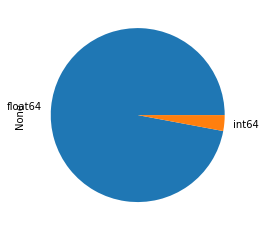

In [25]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

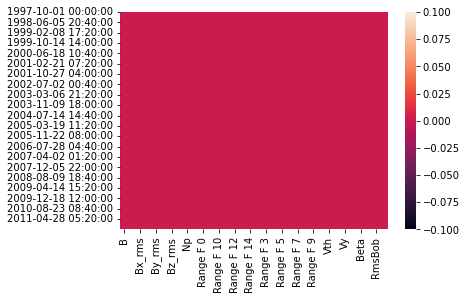

In [26]:
sns.heatmap(df.isna())

In [29]:
df['target'].value_counts(normalize=True)

0    0.901935
1    0.098065
Name: target, dtype: float64

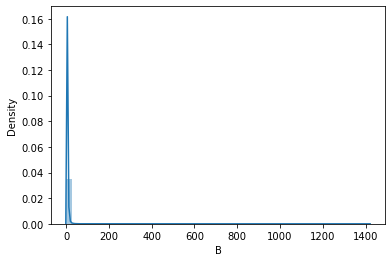

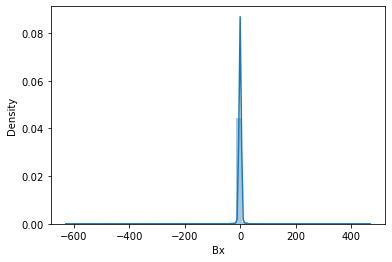

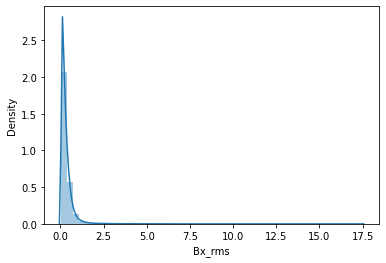

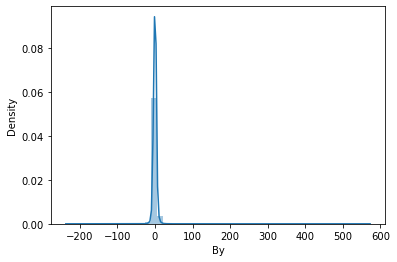

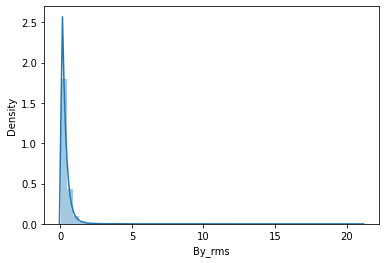

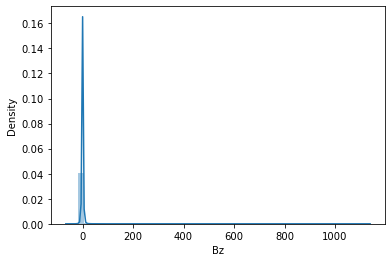

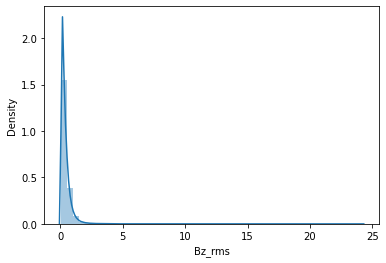

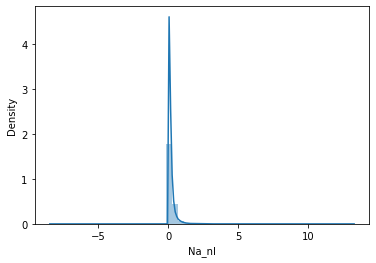

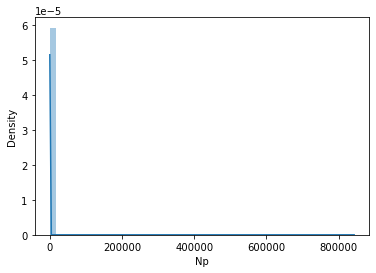

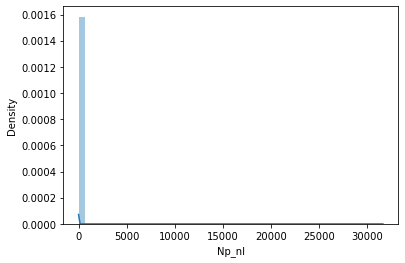

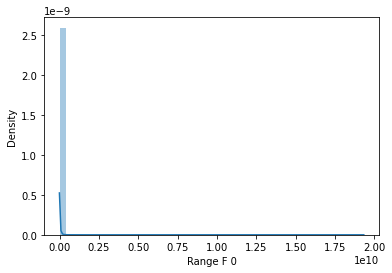

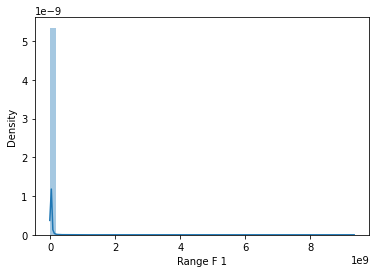

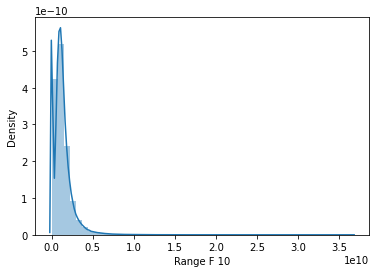

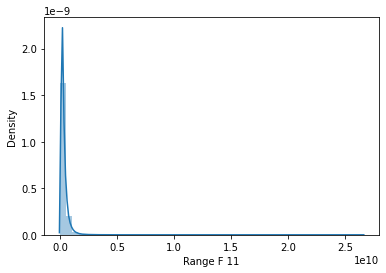

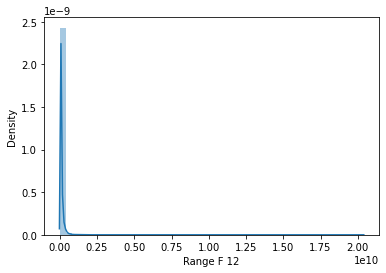

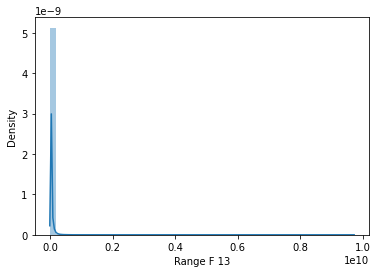

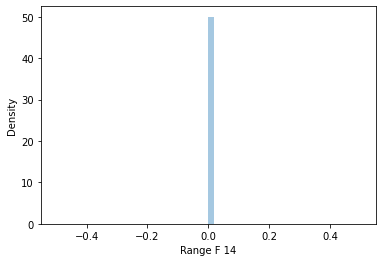

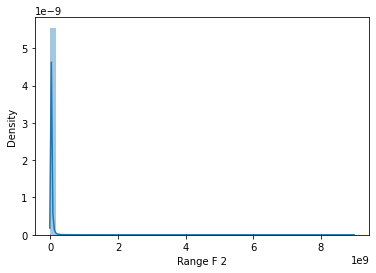

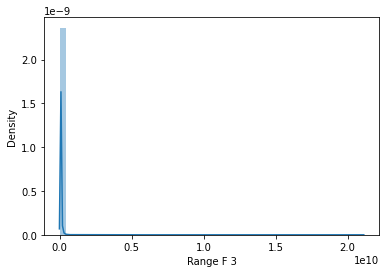

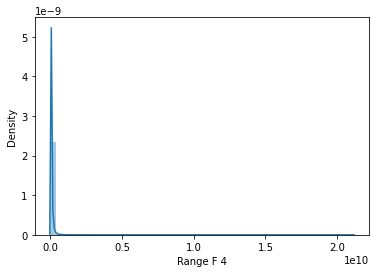

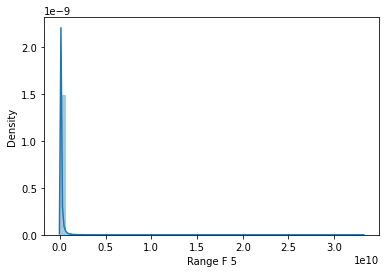

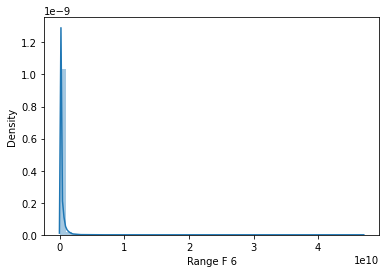

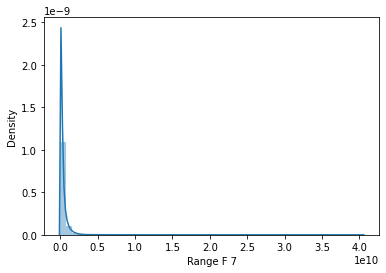

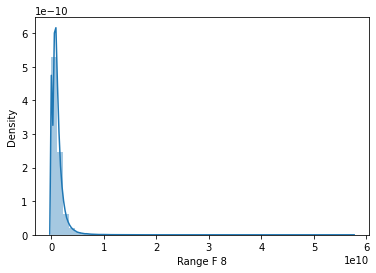

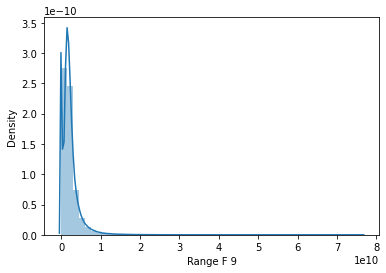

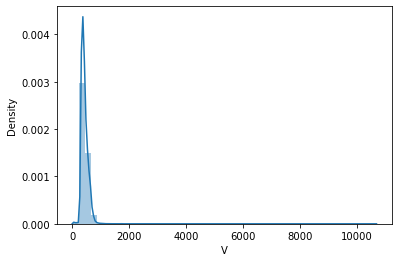

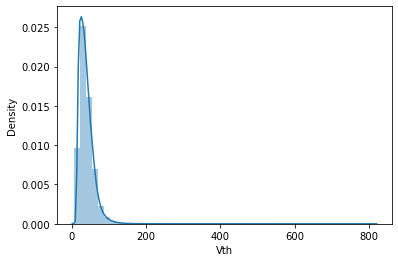

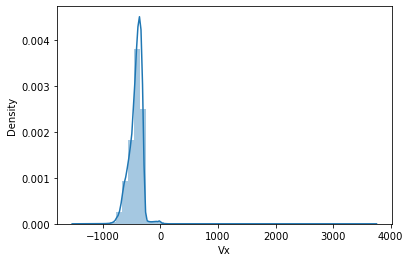

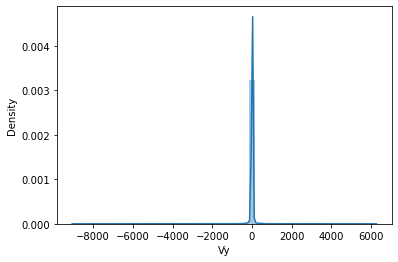

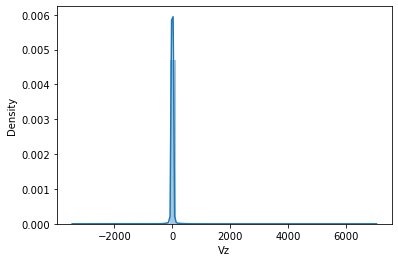

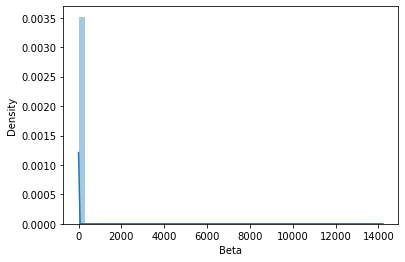

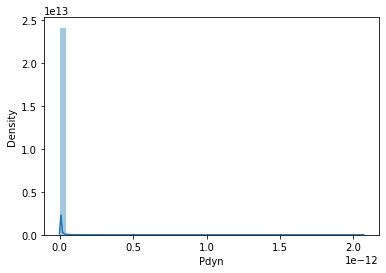

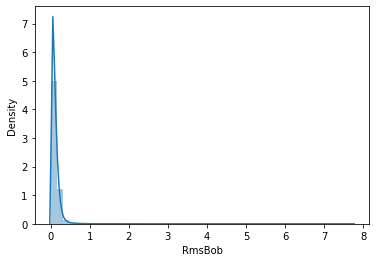

In [35]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [6]:
solar_wind = df[df['target']==0]
solar_storm = df[df['target']==1]

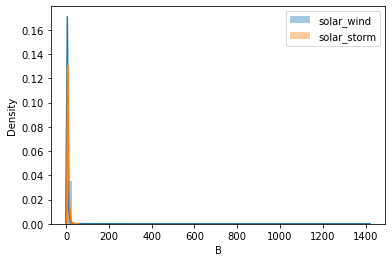

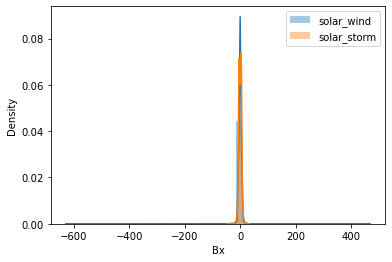

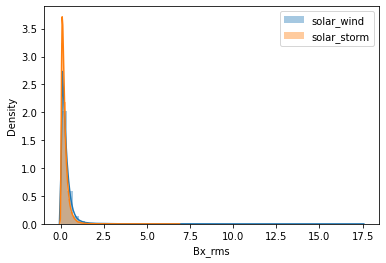

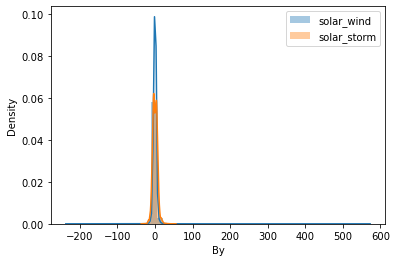

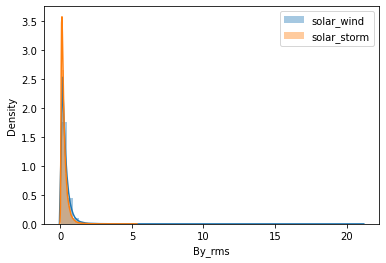

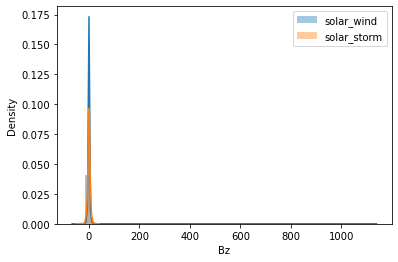

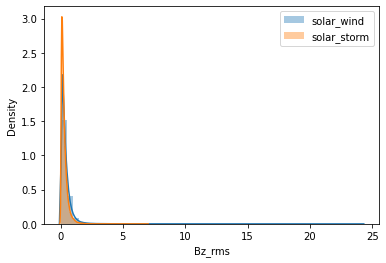

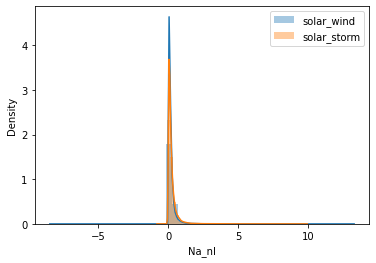

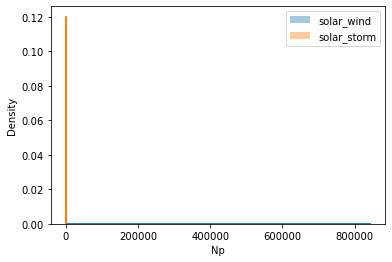

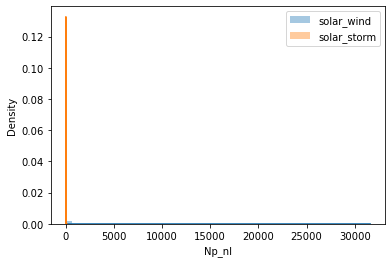

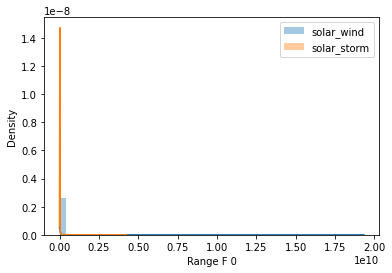

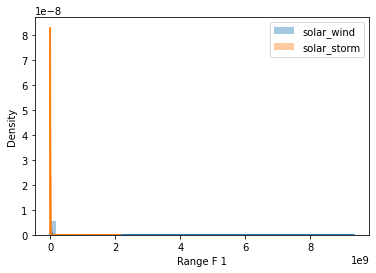

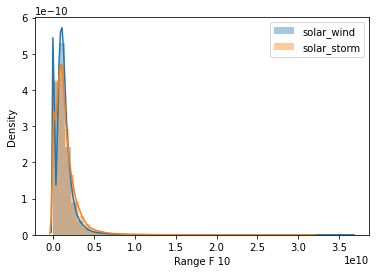

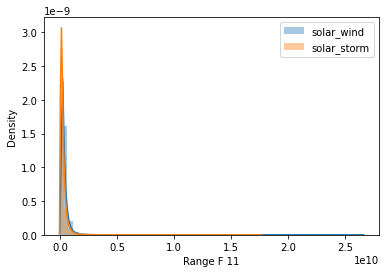

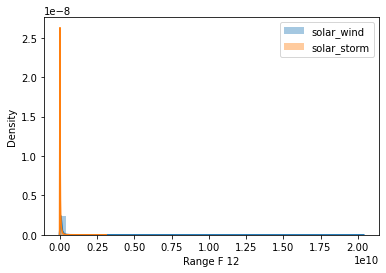

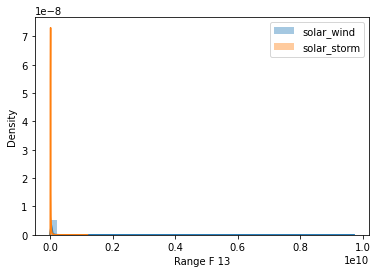

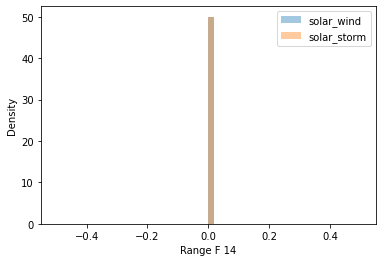

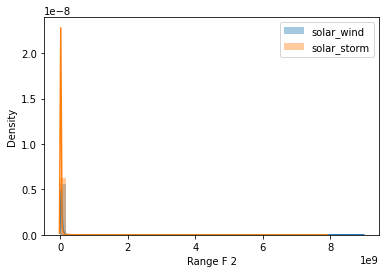

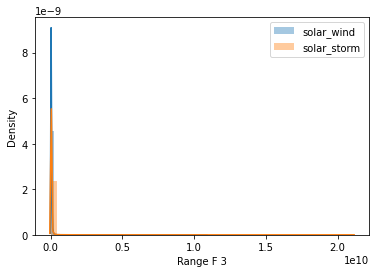

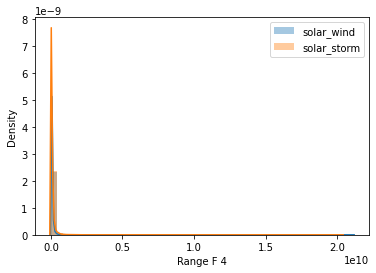

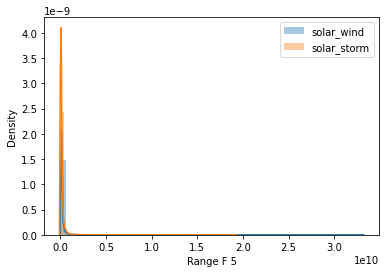

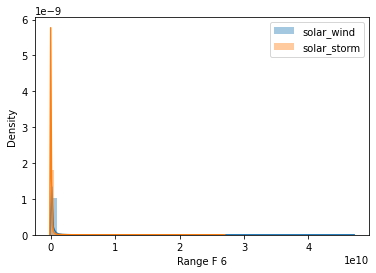

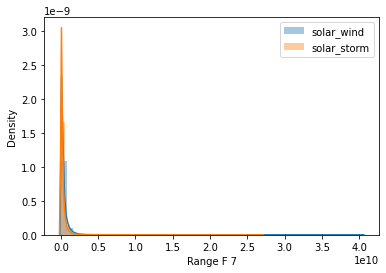

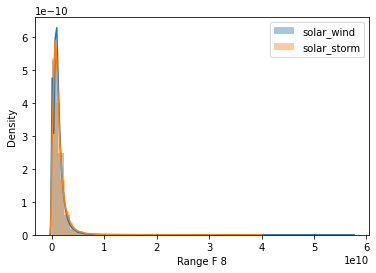

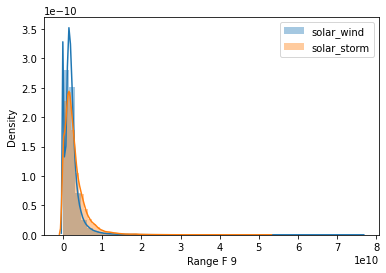

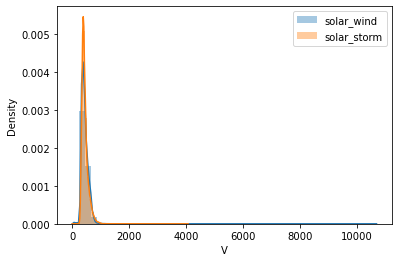

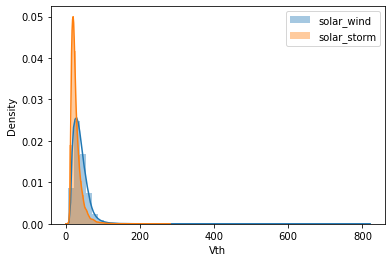

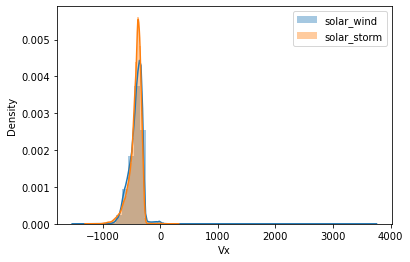

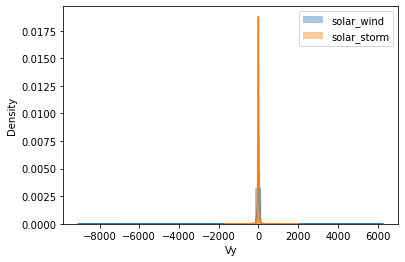

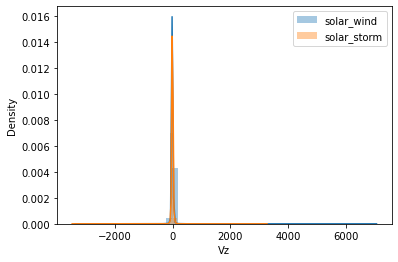

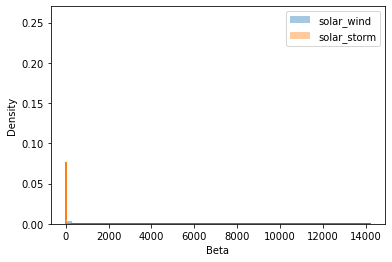

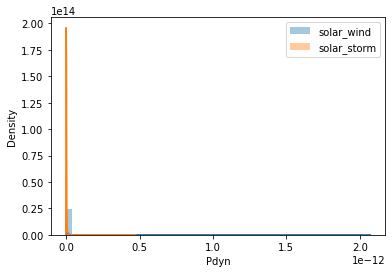

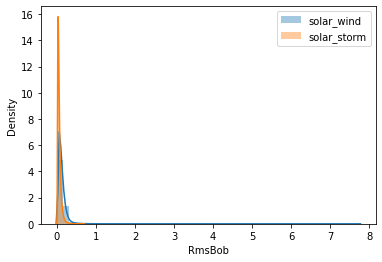

In [40]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(solar_wind[col], label='solar_wind')
    sns.distplot(solar_storm[col], label='solar_storm')
    plt.legend()

In [ ]:
#sns.pairplot(df)

<AxesSubplot:>

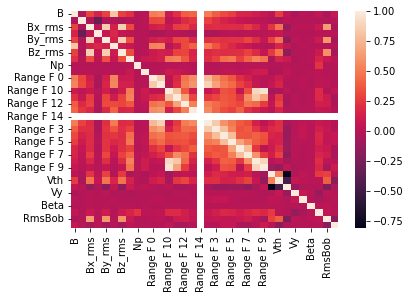

In [6]:
sns.heatmap(df.corr())

In [9]:
df['Range F 14'].value_counts()

0.0    749520
Name: Range F 14, dtype: int64

In [7]:
df.corr()['target'].sort_values()

RmsBob       -0.188820
Vth          -0.169159
Bz_rms       -0.075272
By_rms       -0.074046
Bx_rms       -0.069580
Range F 7    -0.066779
Range F 11   -0.062660
Range F 12   -0.041265
Range F 6    -0.036453
Vx           -0.016712
Range F 13   -0.014751
Beta         -0.012187
Range F 2    -0.012051
Range F 1    -0.007573
Bz           -0.007346
Range F 3    -0.005563
Vy           -0.003865
Range F 0    -0.002964
Np           -0.000374
Np_nl        -0.000015
Bx            0.002302
V             0.004712
Pdyn          0.007165
Vz            0.008171
Range F 8     0.013153
By            0.019582
Na_nl         0.033317
Range F 10    0.046639
Range F 4     0.058661
Range F 5     0.064918
B             0.075288
Range F 9     0.099569
target        1.000000
Range F 14         NaN
Name: target, dtype: float64

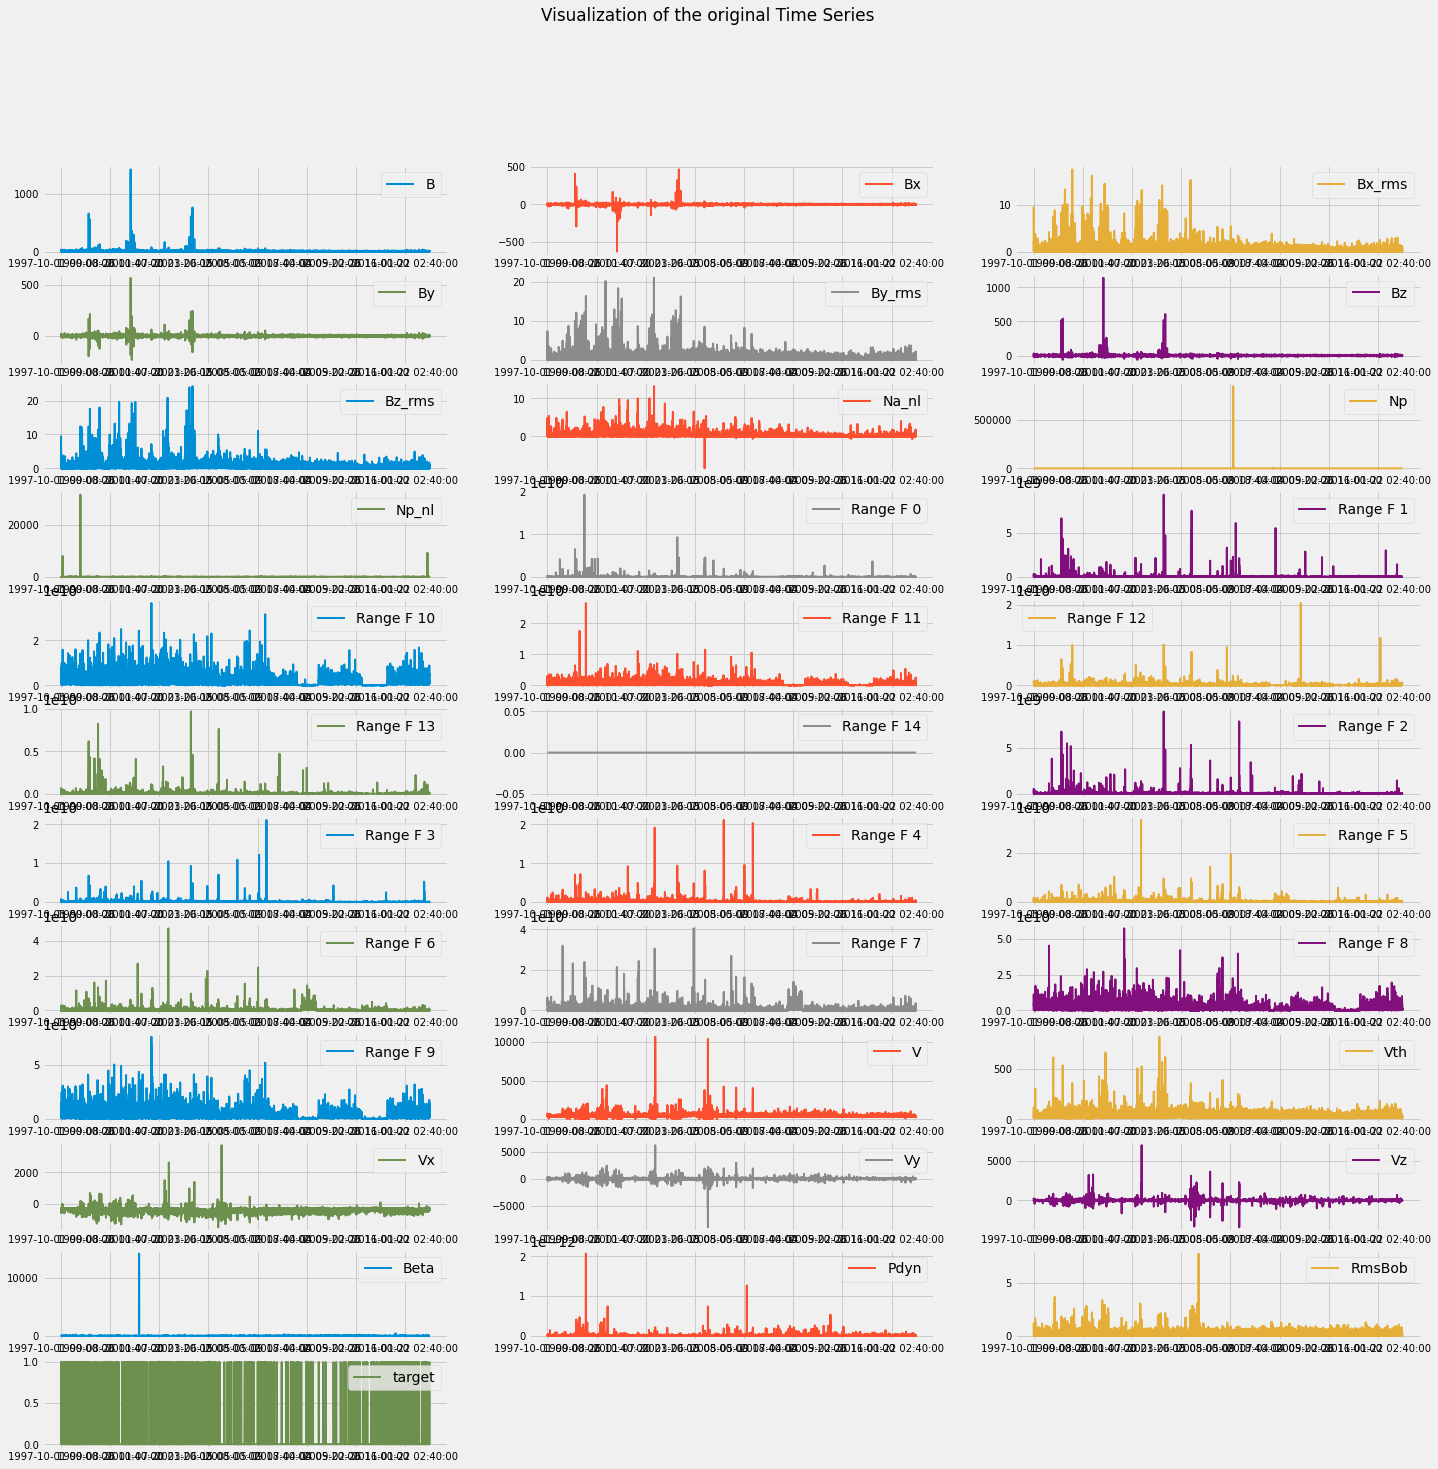

In [11]:
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
        layout=(12, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

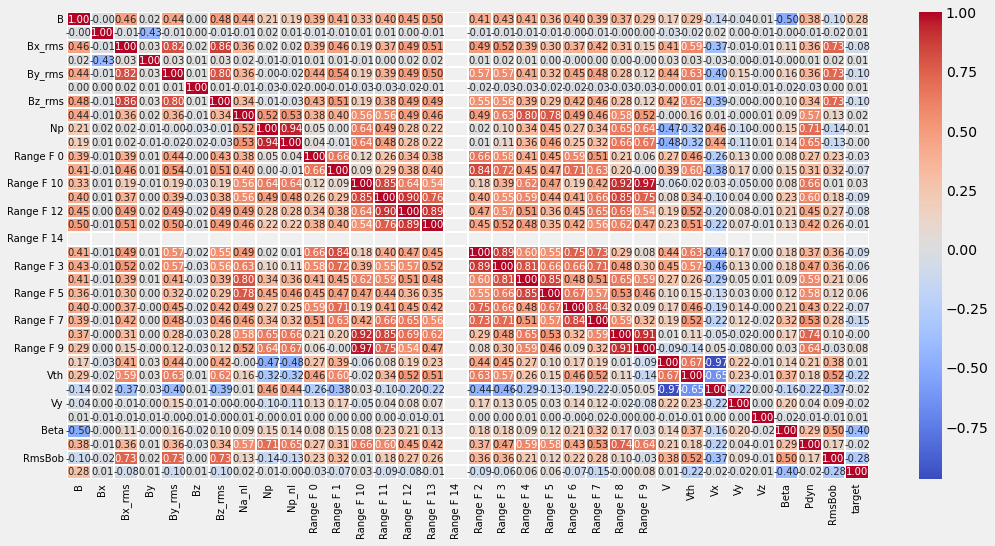

In [12]:
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [6]:
y = df['target']
X = df.drop(columns=['target'])

y_train = data_train['target']
X_train = data_train.drop(columns=['target'])

y_test = data_test['target']
X_test = data_test.drop(columns=['target'])

In [33]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
#X_train, X_test, y_train, y_test = train_test_split(train, test,
#    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [ ]:

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [8]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from keras.metrics import binary_accuracy
from time import time

2023-01-19 20:34:38.595477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
N = X_train.shape[2]                 # number of features
T=50

In [18]:
model = Sequential()
model.add(LSTM(100, input_shape = (T, N)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy"
              , metrics=[binary_accuracy]
              , optimizer="adam")
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               53600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 53,701
Trainable params: 53,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
X_train.shape

(539136, 33)

In [26]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
model.fit(X_train, y_train, batch_size=64, epochs=5, class_weight=class_weights)
model.evaluate(X_test, y_test)
y_test_prob = model.predict(X_test, verbose=1)
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

Epoch 1/5
8424/8424 [==============================] - 417s 49ms/step - loss: 0.2311 - binary_accuracy: 0.8939
Epoch 2/5
8424/8424 [==============================] - 414s 49ms/step - loss: 0.1727 - binary_accuracy: 0.9239
Epoch 3/5
8424/8424 [==============================] - 327s 39ms/step - loss: 0.1420 - binary_accuracy: 0.9386
Epoch 4/5
8424/8424 [==============================] - 314s 37ms/step - loss: 0.1121 - binary_accuracy: 0.9539
Epoch 5/5
6575/6575 [==============================] - 80s 12ms/step


0.5605035774328498

In [30]:
print(accuracy_score(y_test, y_test_pred))
print(log_loss(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(f"The balanced accuracy of the default model is "
      f"{balanced_accuracy_score(y_test, y_test_pred):.3f}")

0.946569130732375
0.2034608073566189
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    196525
           1       0.61      0.52      0.56     13859

    accuracy                           0.95    210384
   macro avg       0.79      0.75      0.77    210384
weighted avg       0.94      0.95      0.94    210384

The balanced accuracy of the default model is 0.747


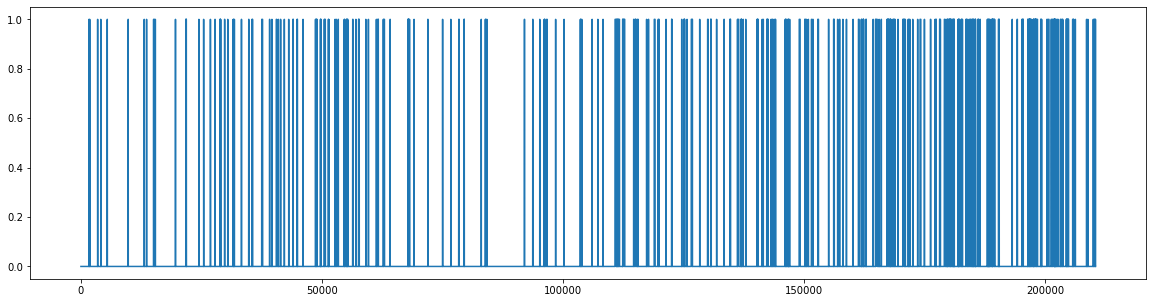

In [36]:
plt.figure(figsize=(20,5))
plt.plot(y_test_pred)

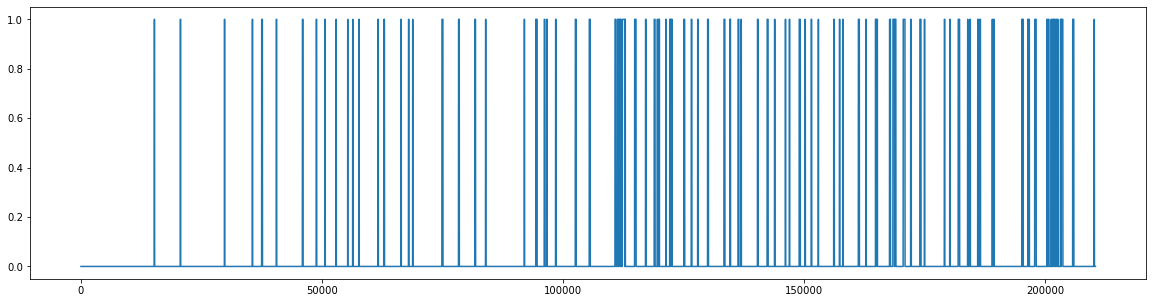

In [37]:
plt.figure(figsize=(20,5))
plt.plot(y_test)

In [36]:
T=50
prepend_features = X_train.iloc[-(T-1):]
X_val = pd.concat([prepend_features, X_val], axis=0)
prepend_features2 = X_val.iloc[-(T-1):]
X_test = pd.concat([prepend_features2, X_test], axis=0)

In [22]:
from sklearn.preprocessing import MinMaxScaler

# splitting the data into sequences
def split_sequence(sequence_X, sequence_y, n_steps):
    X, y = list(), list()
    for i in range(len(sequence_X)):
        end_ix = i + n_steps
        if end_ix > len(sequence_X)-1:
            break
        seq_x, seq_y = sequence_X[i:end_ix], sequence_y[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Normalizing the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [20]:
len(X_train)

468450

In [38]:
new_X, new_y = split_sequence(X, y, 50)

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y,
    test_size=0.2, shuffle = False, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [37]:
new_X_train, new_y_train = split_sequence(X_train, y_train, 50)
new_X_val, new_y_val = split_sequence(X_val, y_val, 50)
new_X_test, new_y_test = split_sequence(X_test, y_test, 50)

IndexError: index 134784 is out of bounds for axis 0 with size 134784

In [27]:
time_steps = 50
num_features = 33

In [29]:
# Import necessary libraries
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))

# Define the model
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, num_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
model.fit(new_X_train, new_y_train, epochs=1, batch_size=32, class_weight=class_weights)

# Evaluate the model on the test data
score = model.evaluate(X_val, y_val, batch_size=32)

# Make predictions on new data
y_pred = model.predict(X_test)



Epoch 1/10
 2428/14638 [===>..........................] - ETA: 4:14 - loss: 0.3242 - accuracy: 0.9011

KeyboardInterrupt: 

In [ ]:
y_test_prob = model.predict(X_test, verbose=1)
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)

In [ ]:
print(accuracy_score(y_test, y_test_pred))
print(log_loss(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred))
print(f"The balanced accuracy of the default model is "
      f"{balanced_accuracy_score(y_test, y_test_pred):.3f}")

In [9]:
T = 50  # my choice of the timesteps window
prepend_features = X_train.iloc[-(T-1):]
X_test = pd.concat([prepend_features, X_test], axis=0)


In [10]:
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(X_train.values),
                                     index=X_train.index,
                                     columns=X_train.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(X_test.values),
                                    index=X_test.index,
                                    columns=X_test.columns)

scaled_train_features.shape, scaled_test_features.shape

((539136, 33), (210433, 33))

In [11]:
from tqdm import tqdm

# Create sequences of T timesteps
train_labels = y_train.copy()
test_labels = y_test.copy()
X_train, y_train = [], []
for i in tqdm(range(train_labels.shape[0] - (T-1))):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])


100%|██████████| 539087/539087 [01:04<00:00, 8407.83it/s]


In [12]:
X_train = np.array(X_train)

In [13]:
y_train = np.array(y_train).reshape(-1,1)

In [14]:
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')


Train data dimensions: (539087, 50, 33), (539087, 1)


In [15]:

X_test, y_test = [], []
for i in tqdm(range(test_labels.shape[0])):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

100%|██████████| 210384/210384 [00:26<00:00, 7942.45it/s]


Test data dimensions: (210384, 50, 33), (210384, 1)


In [1]:
# Let's make a list of CONSTANTS for modelling:
T = 50  # my choice of the timesteps window
LAYERS = [8, 8, 8, 1]                # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                          # batch size
EPOCH = 50                           # number of epochs
LR = 5e-2                            # learning rate of the gradient descent
LAMBD = 3e-2                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
'''model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())'''
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(lr=LR))
print(model.summary())

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_acc', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                    shuffle=True,verbose=0,
                    callbacks=[lr_decay, early_stop])
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)
# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')
'''
# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['acc'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_acc'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()'''

NameError: name 'X_train' is not defined

In [23]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def compute_rolling_std(X_df, feature, time_window, center=False):
    """
    For a given dataframe, compute the standard deviation over
    a defined period of time (time_window) of a defined feature

    Parameters
    ----------
    X : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling std from
    time_window : str
        string that defines the length of the time window passed to `rolling`
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    name = "_".join([feature, time_window, "std"])
    X_df[name] = X_df[feature].rolling(time_window, center=center).std()
    X_df[name] = X_df[name].ffill().bfill()
    X_df[name] = X_df[name].astype(X_df[feature].dtype)
    return X_df


class FeatureExtractor(BaseEstimator):
    def fit(self, X, y):
        return self

    def transform(self, X):
        return compute_rolling_std(X, "Beta", "2h")


def get_estimator():

    feature_extractor = FeatureExtractor()

    classifier = BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(),
        n_estimators=10, random_state=42
    )

    pipe = make_pipeline(feature_extractor, StandardScaler(), classifier)
    return pipe

In [10]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline

# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    #model.set_params(class_weight='balanced')
    model = get_estimator()

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

NameError: name 'get_estimator' is not defined

In [ ]:
est = HistGradientBoostingRegressor(
    max_iter=10,
    validation_fraction=0.2,
    random_state=42,
    l2_regularization=0.,
    min_samples_leaf=20,
    learning_rate=0.3,
    n_iter_no_change=5)

In [16]:
import sklearn

In [ ]:
# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = sklearn.svm.SVC(C=1.0, kernel='linear', class_weight='balanced')
    #model.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier(
        max_iter=100,
        random_state=42,
        l2_regularization=0.1,
        min_samples_leaf=50,
        learning_rate=0.1
    )
    #model.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8625200128081972
0.35373648535856156
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    102635
           1       0.67      0.44      0.53     22285

    accuracy                           0.86    124920
   macro avg       0.78      0.70      0.73    124920
weighted avg       0.85      0.86      0.85    124920

The balanced accuracy of the default model is 0.698
0.9287544028178034
0.1891469385375107
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    113290
           1       0.67      0.46      0.55     11630

    accuracy                           0.93    124920
   macro avg       0.81      0.72      0.75    124920
weighted avg       0.92      0.93      0.92    124920

The balanced accuracy of the default model is 0.720
0.9490794108229267
0.14826248260254132
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    116253
           1     

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = XGBClassifier()
    #model.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")


0.854018571886007
0.42746343665342756
              precision    recall  f1-score   support

           0       0.88      0.95      0.91    102635
           1       0.64      0.43      0.51     22285

    accuracy                           0.85    124920
   macro avg       0.76      0.69      0.71    124920
weighted avg       0.84      0.85      0.84    124920

The balanced accuracy of the default model is 0.686
0.9234550112071725
0.20726714857427903
              precision    recall  f1-score   support

           0       0.94      0.97      0.96    113290
           1       0.62      0.45      0.52     11630

    accuracy                           0.92    124920
   macro avg       0.78      0.71      0.74    124920
weighted avg       0.91      0.92      0.92    124920

The balanced accuracy of the default model is 0.710
0.942114953570285
0.16969853435077806
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    116253
           1      

In [7]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier()
    #model.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8636087095741274
0.3489279822640276
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    102635
           1       0.68      0.44      0.54     22285

    accuracy                           0.86    124920
   macro avg       0.78      0.70      0.73    124920
weighted avg       0.85      0.86      0.85    124920

The balanced accuracy of the default model is 0.699
0.9280659622158182
0.19001223837195086
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    113290
           1       0.66      0.46      0.54     11630

    accuracy                           0.93    124920
   macro avg       0.81      0.72      0.75    124920
weighted avg       0.92      0.93      0.92    124920

The balanced accuracy of the default model is 0.717
0.9489433237271854
0.14692833445983572
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    116253
           1     

In [14]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier(
        max_iter=100,
        random_state=42,
        l2_regularization=0.1,
        min_samples_leaf=50,
        learning_rate=0.1
    ).set_params(class_weight='balanced')
    #model.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8224943964137048
0.40605598565104484
              precision    recall  f1-score   support

           0       0.93      0.85      0.89    102635
           1       0.50      0.68      0.58     22285

    accuracy                           0.82    124920
   macro avg       0.71      0.77      0.73    124920
weighted avg       0.85      0.82      0.83    124920

The balanced accuracy of the default model is 0.768
0.8835414665385847
0.2814716610081314
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    113290
           1       0.43      0.73      0.54     11630

    accuracy                           0.88    124920
   macro avg       0.70      0.82      0.74    124920
weighted avg       0.92      0.88      0.90    124920

The balanced accuracy of the default model is 0.815
0.8811239193083573
0.28126929801361855
              precision    recall  f1-score   support

           0       0.98      0.89      0.93    116253
           1     

In [12]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = HistGradientBoostingClassifier(
        max_iter=10,
        validation_fraction=0.2,
        random_state=42,
        l2_regularization=0.,
        min_samples_leaf=20,
        learning_rate=0.3,
        n_iter_no_change=5).set_params(class_weight='balanced')
    #model.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8168267691322446
0.4142368526340776
              precision    recall  f1-score   support

           0       0.94      0.84      0.88    102635
           1       0.49      0.73      0.59     22285

    accuracy                           0.82    124920
   macro avg       0.71      0.78      0.74    124920
weighted avg       0.86      0.82      0.83    124920

The balanced accuracy of the default model is 0.784
0.8650016010246557
0.3324700329994757
              precision    recall  f1-score   support

           0       0.97      0.87      0.92    113290
           1       0.39      0.78      0.52     11630

    accuracy                           0.87    124920
   macro avg       0.68      0.83      0.72    124920
weighted avg       0.92      0.87      0.88    124920

The balanced accuracy of the default model is 0.826
0.8728226064681396
0.31654223401059955
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    116253
           1      

In [22]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(),
        n_estimators=10, random_state=42
    )
    #model.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)

    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8221341658661543
0.4011755038333169
              precision    recall  f1-score   support

           0       0.93      0.85      0.89    102635
           1       0.50      0.70      0.58     22285

    accuracy                           0.82    124920
   macro avg       0.71      0.77      0.73    124920
weighted avg       0.85      0.82      0.83    124920

The balanced accuracy of the default model is 0.773
0.8833573487031701
0.2835028713886188
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    113290
           1       0.43      0.74      0.54     11630

    accuracy                           0.88    124920
   macro avg       0.70      0.82      0.74    124920
weighted avg       0.92      0.88      0.90    124920

The balanced accuracy of the default model is 0.819
0.8851585014409222
0.2844930815100286
              precision    recall  f1-score   support

           0       0.98      0.89      0.94    116253
           1       

In [8]:
import sklearn
sklearn.__version__

'1.2.0'

In [11]:
import imblearn
imblearn.__version__

'0.10.1'

In [9]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    model = BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(),
        n_estimators=10, random_state=42
    )
    #model.set_params(class_weight='balanced')
    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8221341658661543
0.4011755049879597
              precision    recall  f1-score   support

           0       0.93      0.85      0.89    102635
           1       0.50      0.70      0.58     22285

    accuracy                           0.82    124920
   macro avg       0.71      0.77      0.73    124920
weighted avg       0.85      0.82      0.83    124920

The balanced accuracy of the default model is 0.773
0.8833573487031701
0.28350287208930924
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    113290
           1       0.43      0.74      0.54     11630

    accuracy                           0.88    124920
   macro avg       0.70      0.82      0.74    124920
weighted avg       0.92      0.88      0.90    124920

The balanced accuracy of the default model is 0.819
0.8851585014409222
0.2844930815100286
              precision    recall  f1-score   support

           0       0.98      0.89      0.94    116253
           1      

In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    model = BalancedBaggingClassifier(
        estimator=HistGradientBoostingClassifier(),
        n_estimators=10, random_state=42
    )
    #model.set_params(class_weight='balanced')
    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8221341658661543
6.143367198981782
              precision    recall  f1-score   support

           0       0.93      0.85      0.89    102635
           1       0.50      0.70      0.58     22285

    accuracy                           0.82    124920
   macro avg       0.71      0.77      0.73    124920
weighted avg       0.85      0.82      0.83    124920

The balanced accuracy of the default model is 0.773
0.8833573487031701
4.028768310958939
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    113290
           1       0.43      0.74      0.54     11630

    accuracy                           0.88    124920
   macro avg       0.70      0.82      0.74    124920
weighted avg       0.92      0.88      0.90    124920

The balanced accuracy of the default model is 0.819
0.8851585014409222
3.96656482493497
              precision    recall  f1-score   support

           0       0.98      0.89      0.94    116253
           1       0.35

In [61]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    # Entrainer un modèle sur le jeu d'entraînement
    model = RandomForestClassifier(n_estimators=100, random_state=42)#LogisticRegression()
    model.set_params(class_weight='balanced_subsample')
    model.fit(X_train, y_train, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8614873519052193
4.784074157108582
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    102635
           1       0.74      0.34      0.47     22285

    accuracy                           0.86    124920
   macro avg       0.81      0.66      0.69    124920
weighted avg       0.85      0.86      0.84    124920

The balanced accuracy of the default model is 0.658
0.925392251040666
2.576872494694967
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    113290
           1       0.69      0.36      0.47     11630

    accuracy                           0.93    124920
   macro avg       0.81      0.67      0.72    124920
weighted avg       0.91      0.93      0.91    124920

The balanced accuracy of the default model is 0.672


KeyboardInterrupt: 

In [15]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    model = RandomForestClassifier(n_estimators=100, random_state=42)#LogisticRegression()
    model.set_params(class_weight='balanced')
    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8615754082612872
4.781032945536351
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    102635
           1       0.74      0.34      0.47     22285

    accuracy                           0.86    124920
   macro avg       0.81      0.66      0.69    124920
weighted avg       0.85      0.86      0.84    124920

The balanced accuracy of the default model is 0.658
0.925400256163945
2.5765957258934793
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    113290
           1       0.69      0.36      0.47     11630

    accuracy                           0.93    124920
   macro avg       0.81      0.67      0.72    124920
weighted avg       0.91      0.93      0.91    124920

The balanced accuracy of the default model is 0.671
0.9513288504642972
1.681047308230116
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    116253
           1       0.8

In [21]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = LogisticRegression()
    classifier.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)
    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.7621357668908101
0.4989874362134243
              precision    recall  f1-score   support

           0       0.95      0.75      0.84    102635
           1       0.41      0.81      0.55     22285

    accuracy                           0.76    124920
   macro avg       0.68      0.78      0.69    124920
weighted avg       0.85      0.76      0.79    124920

The balanced accuracy of the default model is 0.779
0.8341578610310599
0.3776105307358711
              precision    recall  f1-score   support

           0       0.97      0.84      0.90    113290
           1       0.33      0.74      0.45     11630

    accuracy                           0.83    124920
   macro avg       0.65      0.79      0.68    124920
weighted avg       0.91      0.83      0.86    124920

The balanced accuracy of the default model is 0.790
0.7586295228946526
0.47079395501640725
              precision    recall  f1-score   support

           0       0.99      0.75      0.85    116253
           1      

In [19]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    classifier = LogisticRegression()
    classifier.set_params(class_weight='balanced')
    model = make_pipeline(StandardScaler(), classifier)
    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.7621357668908101
8.215701994735529
              precision    recall  f1-score   support

           0       0.95      0.75      0.84    102635
           1       0.41      0.81      0.55     22285

    accuracy                           0.76    124920
   macro avg       0.68      0.78      0.69    124920
weighted avg       0.85      0.76      0.79    124920

The balanced accuracy of the default model is 0.779
0.8341578610310599
5.728097568568621
              precision    recall  f1-score   support

           0       0.97      0.84      0.90    113290
           1       0.33      0.74      0.45     11630

    accuracy                           0.83    124920
   macro avg       0.65      0.79      0.68    124920
weighted avg       0.91      0.83      0.86    124920

The balanced accuracy of the default model is 0.790
0.7586295228946526
8.336827529010845
              precision    recall  f1-score   support

           0       0.99      0.75      0.85    116253
           1       0.2

In [10]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Séparer les données en X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrainer un modèle sur le jeu d'entraînement
    model = LogisticRegression()
    model.set_params(class_weight='balanced')
    model.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.7743836055075248
7.79262827681367
              precision    recall  f1-score   support

           0       0.89      0.83      0.86    102635
           1       0.40      0.54      0.46     22285

    accuracy                           0.77    124920
   macro avg       0.65      0.68      0.66    124920
weighted avg       0.80      0.77      0.79    124920

The balanced accuracy of the default model is 0.681
0.8033541466538585
6.792027961441572
              precision    recall  f1-score   support

           0       0.94      0.83      0.88    113290
           1       0.24      0.51      0.33     11630

    accuracy                           0.80    124920
   macro avg       0.59      0.67      0.61    124920
weighted avg       0.88      0.80      0.83    124920

The balanced accuracy of the default model is 0.672
0.6691802753762408
11.426353694162964
              precision    recall  f1-score   support

           0       0.96      0.67      0.79    116253
           1       0.1

In [11]:
y_pred = pd.Series(y_pred)
y_pred.index = y_test.index

In [12]:
y_pred.value_counts()

0    92501
1    32419
dtype: int64

In [13]:
y_test.value_counts()

0    113213
1     11707
Name: target, dtype: int64

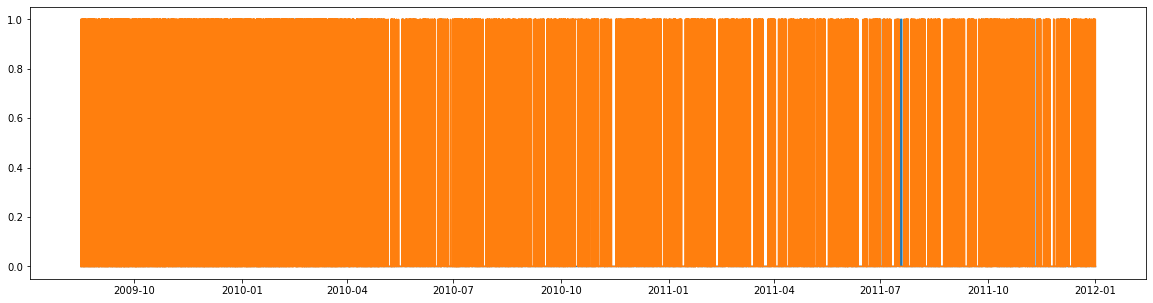

In [14]:
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(y_pred)